In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

path = os.path.join('Reddit_Data.csv')
path

'Reddit_Data.csv'

In [3]:

data = pd.read_csv(path)
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
data.loc[0,'clean_comment']='aaa'+data.loc[0,'clean_comment']

In [5]:
data.head()

,clean_comment,category
0,aaa family mormon have never tried explain the...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [6]:
data['category_str']=data['category'].replace([1,0,-1],['Positive','Neutral','Negative'])
data['category']=data['category'].replace([-1],[2])

In [7]:
print("data is \n", data.head())
print("data shape is\n", data.count())

data is 
                                        clean_comment  category category_str
0  aaa family mormon have never tried explain the...         1     Positive
1  buddhism has very much lot compatible with chr...         1     Positive
2  seriously don say thing first all they won get...         2     Negative
3  what you have learned yours and only yours wha...         0      Neutral
4  for your own benefit you may want read living ...         1     Positive
data shape is
 clean_comment    37149
category         37249
category_str     37249
dtype: int64


In [8]:
# rows_with_nan = [index for index, row in data.iterrows() if row.isnull().any()]
data['clean_comment'].isna().sum()


100

In [9]:
# print(rows_with_nan)
data.head(10)

,clean_comment,category,category_str
0,aaa family mormon have never tried explain the...,1,Positive
1,buddhism has very much lot compatible with chr...,1,Positive
2,seriously don say thing first all they won get...,2,Negative
3,what you have learned yours and only yours wha...,0,Neutral
4,for your own benefit you may want read living ...,1,Positive
5,you should all sit down together and watch the...,2,Negative
6,was teens when discovered zen meditation was ...,1,Positive
7,jesus was zen meets jew,0,Neutral
8,there are two varieties christians dogmatic th...,2,Negative
9,dont worry about trying explain yourself just ...,1,Positive


In [10]:
print(data.loc[413])

clean_comment        NaN
category               0
category_str     Neutral
Name: 413, dtype: object


In [11]:
print(data.count())


clean_comment    37149
category         37249
category_str     37249
dtype: int64


In [12]:
data=data.dropna()

In [13]:
# rows_with_nan = [index for index, row in data.iterrows() if row.isnull().any()]
# print(rows_with_nan)
data['clean_comment'].isna().sum()


0

In [14]:
data.shape

(37149, 3)

In [15]:
print(data.groupby('category_str').size())

category_str
Negative     8277
Neutral     13042
Positive    15830
dtype: int64


In [16]:
tempp = data.index[data['category_str'] == "Positive"].tolist()
tempnt = data.index[data['category_str'] == "Negative"].tolist()
tempne = data.index[data['category_str'] == "Neutral"].tolist()


In [17]:
print(len(tempp),len(tempnt),len(tempne))

15830 8277 13042


In [18]:



data.drop(random.sample(tempp, len(tempp)-8000),inplace=True,axis=0,)
data.drop(random.sample(tempnt, len(tempnt)-8000),inplace=True,axis=0,)
data.drop(random.sample(tempne, len(tempne)-8000),inplace=True,axis=0,)



In [19]:
ind=pd.Index(range(len(data)))
data = data.set_index(ind)


In [20]:
# data.set_index([0:24000])
print(data.loc[0])

clean_comment    aaa family mormon have never tried explain the...
category                                                         1
category_str                                              Positive
Name: 0, dtype: object


PreProcessing

In [21]:
vowels = ['a','e','i','o','u']

def vowel_finder(word):
  for i in range(len(word)):
    if word[i] in vowels or (i > 0 and word[i]=='y' and word[i-1] not in vowels):
      return True
  return False

In [22]:
def double_consonant(word):
  if len(word) < 2:
    return False
  if word[0] == word[1]:
    if word[0] not in vowels:
      return True
  return False

In [23]:
def in_cvc_format(word):
  if len(word) == 3:
    if (word[0] not in vowels) and word[1] in vowels and (word[2] not in vowels and word[2] not in ['w','x','y']):
      return True
  elif len(word)==4:
    if (word[1] not in vowels) or (word [1] == 'y' and word[0] in vowels):
          if word[2] in vowels and (word[3] not in vowels and word[3] not in ['w','x','y']):
            return True
  return False

In [24]:
def m_finder(word):
  m = 0
  if len(word) < 2:
    return m
  for i in range(1,len(word)):
    v = word[i-1]
    c = word[i]
    if (v in vowels) and (c not in vowels) or (v not in vowels and v != 'y') and (c == 'y'):
      m += 1
  return m

In [25]:
def word_stemmer(word):
  #steps

  #step 1
    #1a
  if word[-4:] == 'sses':
    word = word[:-4]+'ss'
  elif word[-3:] == 'ies':
    word = word[:-3]+'i'
  elif word[-2:] == 'ss':
    pass
  elif word[-1:] == 's':
    word = word[:-1]
    #1b
  is_b1 = False
  if word[-3:] == 'eed' and m_finder(word[:-3]) > 0:
    word = word[:-3]+'ee'
    is_b1 = True
  elif vowel_finder(word[:-2]) and word[-2:] == 'ed':
    word = word[:-2]
    is_b1 = True
  elif vowel_finder(word[:-3]) and word[-3:] == 'ing':
    word = word[:-3]
    is_b1 = True
      #cleanup (only if 1b is applied)
  if is_b1 == True:
    if word[-2:] == 'at':
      word = word[:-2]+'ate'
    elif word[-2:] == 'bl':
      word = word[:-2]+'ble'
    elif double_consonant(word[-2:]) and word[-1] not in ['l','s','z']:
      word = word[:-1]
    elif len(word) > 3 and in_cvc_format(word[-4:]) and m_finder(word)==1:
      word = word + 'e'
    #1c
  if vowel_finder(word[:-1]) and word[-1] == 'y':
    word = word[:-1]+'i'
  
  #step 2
  if len(word) > 7 and word[-7:] == 'ational' and m_finder(word[:-7]) > 0: #Relational
    word = word[:-7]+'ate'
  elif len(word) > 7 and word[-7:] == 'ization' and m_finder(word[:-7]) > 0:
    word = word[:-7]+'ize'
  elif len(word) > 7 and word[-7:] == 'iveness' and m_finder(word[:-7]) > 0:
    word = word[:-7]+'ive'
  elif len(word) > 7 and word[-7:] == 'fulness' and m_finder(word[:-7]) > 0:
    word = word[:-7]+'ful'
  elif len(word) > 7 and word[-7:] == 'ousness' and m_finder(word[:-7]) > 0:
    word = word[:-7]+'ous'
  elif len(word) > 6 and word[-6:] == 'biliti' and m_finder(word[:-6]) > 0:
    word = word[:-6]+'ble'
  elif len(word) > 6 and word[-6:] == 'tional' and m_finder(word[:-6]) > 0:
    word = word[:-6]+'tion'
  elif len(word) > 5 and word[-5:] == 'entli' and m_finder(word[:-5]) > 0:
    word = word[:-5]+'ent'
  elif len(word) > 5 and word[-5:] == 'ousli' and m_finder(word[:-5]) > 0:
    word = word[:-5]+'ous'
  elif len(word) > 5 and word[-5:] == 'ation' and m_finder(word[:-5]) > 0:
    word = word[:-5]+'ate'
  elif len(word) > 5 and word[-5:] == 'alism' and m_finder(word[:-5]) > 0:
    word = word[:-5]+'al'
  elif len(word) > 5 and word[-5:] == 'aliti' and m_finder(word[:-5]) > 0:
    word = word[:-5]+'el'
  elif len(word) > 5 and word[-5:] == 'iviti' and m_finder(word[:-5]) > 0:
    word = word[:-5]+'ive'
  elif len(word) > 4 and word[-4:] == 'enci' and m_finder(word[:-4]) > 0:
    word = word[:-4]+'ence'
  elif len(word) > 4 and word[-4:] == 'anvi' and m_finder(word[:-4]) > 0:
    word = word[:-4]+'ance'
  elif len(word) > 4 and word[-4:] == 'izer' and m_finder(word[:-4]) > 0:
    word = word[:-4]+'ize'
  elif len(word) > 4 and word[-4:] == 'ator' and m_finder(word[:-4]) > 0:
    word = word[:-4]+'ate'
  elif len(word) > 4 and word[-4:] == 'abli' and m_finder(word[:-4]) > 0:
    word = word[:-4]+'able'
  elif len(word) > 4 and word[-4:] == 'alli' and m_finder(word[:-4]) > 0:
    word = word[:-4]+'al'
  elif len(word) > 3 and word[-3:] == 'eli' and m_finder(word[:-3]) > 0:
    word = word[:-4]+'e'

  #step 3
  if len(word) > 5 and word[-5:] == 'icate' and m_finder(word[:-5]) > 0 :
    word = word[:-5]+'ic'
  elif len(word) > 5 and word[-5:] == 'ative' and m_finder(word[:-5]) > 0:
    word = word[:-5]
  elif len(word) > 5 and word[-5:] == 'alize' and m_finder(word[:-5]) > 0:
    word = word[:-5]+'al'
  elif len(word) > 5 and word[-5:] == 'iciti' and m_finder(word[:-5]) > 0:
    word = word[:-5]+'ic'
  elif len(word) > 4 and word[-4:] == 'ical' and m_finder(word[:-4]) > 0:
    word = word[:-4]+'ic'
  elif len(word) > 4 and word[-4:] == 'ness' and m_finder(word[:-4]) > 0:
    word = word[:-4]
  elif len(word) > 3 and word[-3:] == 'ful' and m_finder(word[:-3]) > 0:
      word = word[:-3]
  
  #step 4
  if len(word) > 5 and word[-5:] == 'ement'  and m_finder(word[:-5]) > 1:
    word = word[:-5]
  elif len(word) > 4 and word[-4:] == 'ance' and m_finder(word[:-4]) > 1:
    word = word[:-4]
  elif len(word) > 4 and word[-4:] == 'ence' and m_finder(word[:-4]) > 1:
    word = word[:-4]
  elif len(word) > 4 and word[-4:] == 'able' and m_finder(word[:-4]) > 1:
    word = word[:-4]
  elif len(word) > 4 and word[-4:] == 'ible' and m_finder(word[:-4]) > 1:
    word = word[:-4]
  elif len(word) > 4 and word[-4:] == 'ment' and m_finder(word[:-4]) > 1:
    word = word[:-4]
  elif len(word) > 4 and (word[-4:] == 'sion' or word[-4:] == 'tion') and m_finder(word[:-4]) > 1:
    word = word[:-4]
  elif len(word) > 3 and word[-3:] == 'ent' and m_finder(word[:-3]) > 1:
    word = word[:-3]
  elif len(word) > 3 and word[-3:] == 'ive' and m_finder(word[:-3]) > 1:
    word = word[:-3]
  elif len(word) > 3 and word[-3:] == 'ant' and m_finder(word[:-3]) > 1:
    word = word[:-3]
  elif len(word) > 3 and word[-3:] == 'ism' and m_finder(word[:-3]) > 1:
    word = word[:-3]
  elif len(word) > 3 and word[-3:] == 'ate' and m_finder(word[:-3]) > 1:
    word = word[:-3]
  elif len(word) > 3 and word[-3:] == 'iti' and m_finder(word[:-3]) > 1:
    word = word[:-3]
  elif len(word) > 3 and word[-3:] == 'ous' and m_finder(word[:-3]) > 1:
    word = word[:-3]
  elif len(word) > 3 and word[-3:] == 'ize' and m_finder(word[:-3]) > 1:
    word = word[:-3]
  elif len(word) > 2 and word[-2:] == 'al' and m_finder(word[:-2]) > 1:
    word = word[:-2]
  elif len(word) > 2 and word[-2:] == 'er' and m_finder(word[:-2]) > 1:
    word = word[:-2]
  elif len(word) > 2 and word[-2:] == 'ic' and m_finder(word[:-2]) > 1:
    word = word[:-2]
  elif len(word) > 2 and word[-2:] == 'ou' and m_finder(word[:-2]) > 1:
    word = word[:-2]

  
  #step 5
    #5a
  if word[-1] == 'e' and m_finder(word[:-1]) > 1:
    word = word[:-1]
  elif len(word) > 4 and not (in_cvc_format(word[-4:])) and word[-1:]=='e' and m_finder(word[:-1])==1:
    word = word[:-1]
   #5b
  if len(word) > 2 and double_consonant(word[-2:]) and word[-1] == 'l' and m_finder(word) > 1:
    word = word[:-1]

  return word
  


In [26]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [27]:
st = ['a', 'aadi', 'aaj', 'aap', 'aapne', 'aata', 'aati', 'aaya', 'aaye', 'ab', 'abbe', 'abbey', 'abe', 'abhi', 'able', 'about', 'above', 'accha', 'according', 'accordingly', 'acha', 'achcha', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'agar', 'ain', 'aint', "ain't", 'aisa', 'aise', 'aisi', 'alag', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'andar', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ap', 'apan', 'apart', 'apna', 'apnaa', 'apne', 'apni', 'appear', 'are', 'aren', 'arent', "aren't", 'around', 'arre', 'as', 'aside', 'ask', 'asking', 'at', 'aur', 'avum', 'aya', 'aye', 'baad', 'baar', 'bad', 'bahut', 'bana', 'banae', 'banai', 'banao', 'banaya', 'banaye', 'banayi', 'banda', 'bande', 'bandi', 'bane', 'bani', 'bas', 'bata', 'batao', 'bc', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'bhai', 'bheetar', 'bhi', 'bhitar', 'bht', 'bilkul', 'bohot', 'bol', 'bola', 'bole', 'boli', 'bolo', 'bolta', 'bolte', 'bolti', 'both', 'brief', 'bro', 'btw', 'but', 'by', 'came', 'can', 'cannot', 'cant', "can't", 'cause', 'causes', 'certain', 'certainly', 'chahiye', 'chaiye', 'chal', 'chalega', 'chhaiye', 'clearly', "c'mon", 'com', 'come', 'comes', 'could', 'couldn', 'couldnt', "couldn't", 'd', 'de', 'dede', 'dega', 'degi', 'dekh', 'dekha', 'dekhe', 'dekhi', 'dekho', 'denge', 'dhang', 'di', 'did', 'didn', 'didnt', "didn't", 'dijiye', 'diya', 'diyaa', 'diye', 'diyo', 'do', 'does', 'doesn', 'doesnt', "doesn't", 'doing', 'done', 'dono', 'dont', "don't", 'doosra', 'doosre', 'down', 'downwards', 'dude', 'dunga', 'dungi', 'during', 'dusra', 'dusre', 'dusri', 'dvaara', 'dvara', 'dwaara', 'dwara', 'each', 'edu', 'eg', 'eight', 'either', 'ek', 'else', 'elsewhere', 'enough', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'far', 'few', 'fifth', 'fir', 'first', 'five', 'followed', 'following', 'follows', 'for', 'forth', 'four', 'from', 'further', 'furthermore', 'gaya', 'gaye', 'gayi', 'get', 'gets', 'getting', 'ghar', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'good', 'got', 'gotten', 'greetings', 'haan', 'had', 'hadd', 'hadn', 'hadnt', "hadn't", 'hai', 'hain', 'hamara', 'hamare', 'hamari', 'hamne', 'han', 'happens', 'har', 'hardly', 'has', 'hasn', 'hasnt', "hasn't", 'have', 'haven', 'havent', "haven't", 'having', 'he', 'hello', 'help', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', "here's", 'hereupon', 'hers', 'herself', "he's", 'hi', 'him', 'himself', 'his', 'hither', 'hm', 'hmm', 'ho', 'hoga', 'hoge', 'hogi', 'hona', 'honaa', 'hone', 'honge', 'hongi', 'honi', 'hopefully', 'hota', 'hotaa', 'hote', 'hoti', 'how', 'howbeit', 'however', 'hoyenge', 'hoyengi', 'hu', 'hua', 'hue', 'huh', 'hui', 'hum', 'humein', 'humne', 'hun', 'huye', 'huyi', 'i', "i'd", 'idk', 'ie', 'if', "i'll", "i'm", 'imo', 'in', 'inasmuch', 'inc', 'inhe', 'inhi', 'inho', 'inka', 'inkaa', 'inke', 'inki', 'inn', 'inner', 'inse', 'insofar', 'into', 'inward', 'is', 'ise', 'isi', 'iska', 'iskaa', 'iske', 'iski', 'isme', 'isn', 'isne', 'isnt', "isn't", 'iss', 'isse', 'issi', 'isski', 'it', "it'd", "it'll", 'itna', 'itne', 'itni', 'itno', 'its', "it's", 'itself', 'ityaadi', 'ityadi', "i've", 'ja', 'jaa', 'jab', 'jabh', 'jaha', 'jahaan', 'jahan', 'jaisa', 'jaise', 'jaisi', 'jata', 'jayega', 'jidhar', 'jin', 'jinhe', 'jinhi', 'jinho', 'jinhone', 'jinka', 'jinke', 'jinki', 'jinn', 'jis', 'jise', 'jiska', 'jiske', 'jiski', 'jisme', 'jiss', 'jisse', 'jitna', 'jitne', 'jitni', 'jo', 'just', 'jyaada', 'jyada', 'k', 'ka', 'kaafi', 'kab', 'kabhi', 'kafi', 'kaha', 'kahaa', 'kahaan', 'kahan', 'kahi', 'kahin', 'kahte', 'kaisa', 'kaise', 'kaisi', 'kal', 'kam', 'kar', 'kara', 'kare', 'karega', 'karegi', 'karen', 'karenge', 'kari', 'karke', 'karna', 'karne', 'karni', 'karo', 'karta', 'karte', 'karti', 'karu', 'karun', 'karunga', 'karungi', 'kaun', 'kaunsa', 'kayi', 'kch', 'ke', 'keep', 'keeps', 'keh', 'kehte', 'kept', 'khud', 'ki', 'kin', 'kine', 'kinhe', 'kinho', 'kinka', 'kinke', 'kinki', 'kinko', 'kinn', 'kino', 'kis', 'kise', 'kisi', 'kiska', 'kiske', 'kiski', 'kisko', 'kisliye', 'kisne', 'kitna', 'kitne', 'kitni', 'kitno', 'kiya', 'kiye', 'know', 'known', 'knows', 'ko', 'koi', 'kon', 'konsa', 'koyi', 'krna', 'krne', 'kuch', 'kuchch', 'kuchh', 'kul', 'kull', 'kya', 'kyaa', 'kyu', 'kyuki', 'kyun', 'kyunki', 'lagta', 'lagte', 'lagti', 'last', 'lately', 'later', 'le', 'least', 'lekar', 'lekin', 'less', 'lest', 'let', "let's", 'li', 'like', 'liked', 'likely', 'little', 'liya', 'liye', 'll', 'lo', 'log', 'logon', 'lol', 'look', 'looking', 'looks', 'ltd', 'lunga', 'm', 'maan', 'maana', 'maane', 'maani', 'maano', 'magar', 'mai', 'main', 'maine', 'mainly', 'mana', 'mane', 'mani', 'mano', 'many', 'mat', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'mein', 'mera', 'mere', 'merely', 'meri', 'might', 'mightn', 'mightnt', "mightn't", 'mil', 'mjhe', 'more', 'moreover', 'most', 'mostly', 'much', 'mujhe', 'must', 'mustn', 'mustnt', "mustn't", 'my', 'myself', 'na', 'naa', 'naah', 'nahi', 'nahin', 'nai', 'name', 'namely', 'nd', 'ne', 'near', 'nearly', 'necessary', 'neeche', 'need', 'needn', 'neednt', "needn't", 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nhi', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 'nope', 'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'par', 'pata', 'pe', 'pehla', 'pehle', 'pehli', 'people', 'per', 'perhaps', 'phla', 'phle', 'phli', 'placed', 'please', 'plus', 'poora', 'poori', 'provides', 'pura', 'puri', 'q', 'que', 'quite', 'raha', 'rahaa', 'rahe', 'rahi', 'rakh', 'rakha', 'rakhe', 'rakhen', 'rakhi', 'rakho', 'rather', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'rehte', 'rha', 'rhaa', 'rhe', 'rhi', 'ri', 'right', 's', 'sa', 'saara', 'saare', 'saath', 'sab', 'sabhi', 'sabse', 'sahi', 'said', 'sakta', 'saktaa', 'sakte', 'sakti', 'same', 'sang', 'sara', 'sath', 'saw', 'say', 'saying', 'says', 'se', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'shan', 'shant', "shan't", 'she', "she's", 'should', 'shouldn', 'shouldnt', "shouldn't", "should've", 'si', 'since', 'six', 'so', 'soch', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'still', 'sub', 'such', 'sup', 'sure', 't', 'tab', 'tabh', 'tak', 'take', 'taken', 'tarah', 'teen', 'teeno', 'teesra', 'teesre', 'teesri', 'tell', 'tends', 'tera', 'tere', 'teri', 'th', 'tha', 'than', 'thank', 'thanks', 'thanx', 'that', "that'll", 'thats', "that's", 'the', 'theek', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'theres', "there's", 'thereupon', 'these', 'they', "they'd", "they'll", "they're", "they've", 'thi', 'thik', 'thing', 'think', 'thinking', 'third', 'this', 'tho', 'thoda', 'thodi', 'thorough', 'thoroughly', 'those', 'though', 'thought', 'three', 'through', 'throughout', 'thru', 'thus', 'tjhe', 'to', 'together', 'toh', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'true', 'truly', 'try', 'trying', 'tu', 'tujhe', 'tum', 'tumhara', 'tumhare', 'tumhari', 'tune', 'twice', 'two', 'um', 'umm', 'un', 'under', 'unhe', 'unhi', 'unho', 'unhone', 'unka', 'unkaa', 'unke', 'unki', 'unko', 'unless', 'unlikely', 'unn', 'unse', 'until', 'unto', 'up', 'upar', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'usi', 'using', 'uska', 'uske', 'usne', 'uss', 'usse', 'ussi', 'usually', 'vaala', 'vaale', 'vaali', 'vahaan', 'vahan', 'vahi', 'vahin', 'vaisa', 'vaise', 'vaisi', 'vala', 'vale', 'vali', 'various', 've', 'very', 'via', 'viz', 'vo', 'waala', 'waale', 'waali', 'wagaira', 'wagairah', 'wagerah', 'waha', 'wahaan', 'wahan', 'wahi', 'wahin', 'waisa', 'waise', 'waisi', 'wala', 'wale', 'wali', 'want', 'wants', 'was', 'wasn', 'wasnt', "wasn't", 'way', 'we', "we'd", 'well', "we'll", 'went', 'were', "we're", 'weren', 'werent', "weren't", "we've", 'what', 'whatever', "what's", 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', "where's", 'whereupon', 'wherever', 'whether', 'which', 'while', 'who', 'whoever', 'whole', 'whom', "who's", 'whose', 'why', 'will', 'willing', 'with', 'within', 'without', 'wo', 'woh', 'wohi', 'won', 'wont', "won't", 'would', 'wouldn', 'wouldnt', "wouldn't", 'y', 'ya', 'yadi', 'yah', 'yaha', 'yahaan', 'yahan', 'yahi', 'yahin', 'ye', 'yeah', 'yeh', 'yehi', 'yes', 'yet', 'you', "you'd", "you'll", 'your', "you're", 'yours', 'yourself', 'yourselves', "you've", 'yup']


In [28]:


Stopwords = stopwords.words('english')
Stopwords.append(st)

preda = []
def Preprocessing(data):
  for dt in data.clean_comment:
    dt = dt.lower()
    dt = list(dt)
    for letter in dt:
      if (ord(letter) < 97 or ord(letter) > 122) and ord(letter) != 32:
        dt[dt.index(letter)] = ''
    dt = "".join(dt)
    dt = dt.split()
    
    temp = []
    for word in dt:
      if word not in Stopwords:
        word = word_stemmer(word)
        temp.append(word)
    preda.append(" ".join(temp))



Preprocessing(data)

data['PreProcessed Data'] = preda

In [29]:
data.head()

,clean_comment,category,category_str,PreProcessed Data
0,aaa family mormon have never tried explain the...,1,Positive,aaa famili mormon never tri explain still star...
1,buddhism has very much lot compatible with chr...,1,Positive,buddhism much lot compat christian especi cons...
2,seriously don say thing first all they won get...,2,Negative,serious sai thing first get complex explain no...
3,what you have learned yours and only yours wha...,0,Neutral,learn want teach differ focu goal wrap paper b...
4,for your own benefit you may want read living ...,1,Positive,benefit mai want read liv buddha liv christ th...


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = list(data['PreProcessed Data'])

Tfidf_Vectorizer = TfidfVectorizer(analyzer= 'word')
corpus = Tfidf_Vectorizer.fit_transform(corpus)

# X = corpus.toarray()
# pd.DataFrame(corpus.toarray(), columns = Tfidf_Vectorizer.get_feature_names()).head(5)

In [31]:
x=corpus.toarray()


In [32]:
data.shape

(24000, 4)

In [35]:
labels = Tfidf_Vectorizer.get_feature_names_out()
labels

array(['aaa', 'aaaa', 'aaaaand', ..., 'zven', 'zwsemhv', 'zzhqhtlhm'],
      dtype=object)

In [59]:
len(labels)

30242

In [36]:
cs = pd.DataFrame(x,columns=labels)

In [37]:
cs.head()

,aaa,aaaa,aaaaand,aaaah,aaaand,aaadhar,aaah,aaam,aaannnddd,aaaya,...,zuck,zuckeberg,zuckerberg,zuckerburg,zukerberg,zuma,zuni,zven,zwsemhv,zzhqhtlhm
0,0.270413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
cs.to_csv('Vector_data.csv')

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,data.category, test_size = 0.2)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# print(X_train)

(19200, 30242)
(4800, 30242)
(19200,)
(4800,)


In [46]:
Y_train.head()

8764     1
12534    2
3854     1
17987    2
3506     2
Name: category, dtype: int64

In [47]:
x_train = np.asarray(X_train)
y_train = np.asarray(Y_train)
x_test = np.asarray(X_test)
y_test = np.asarray(Y_test)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# print(x_train)

(19200, 30242)
(4800, 30242)
(19200,)
(4800,)


In [40]:
from sklearn.svm import SVC
model = SVC(C=5,kernel='linear')

In [41]:
model.fit(X_train, Y_train)

SVC(C=5, kernel='linear')

In [42]:
y_pre = model.predict(X_test)

In [43]:

print(accuracy_score(y_pre, Y_test))

0.7804761904761904


In [44]:


cfm = confusion_matrix(Y_test, y_pre)
cfm

array([[1302,   79,  102],
       [ 162,  981,  194],
       [ 192,  193,  995]], dtype=int64)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

y_kpre = []

for i in range(3,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    y_kpre.append(knn.predict(X_test))
    

In [63]:
acc = []
for i in y_kpre:
    acc.append(accuracy_score(i,Y_test))

Text(0, 0.5, 'accuracy')

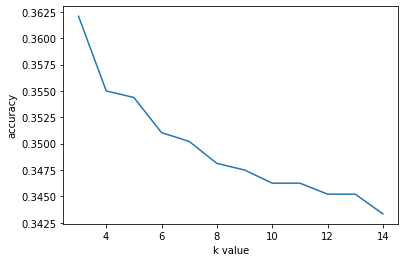

In [64]:



x = np.arange(3,15)

# print(x)

plt.plot(x,acc)
plt.xlabel('k value')
plt.ylabel('accuracy')

In [49]:
from sklearn.linear_model import LogisticRegression

logi_reg =LogisticRegression(penalty='l2', solver='saga', C=5, multi_class='multinomial')

In [50]:
logi_reg.fit(X_train, Y_train)

LogisticRegression(C=5, multi_class='multinomial', solver='saga')

In [51]:
y_lpre = logi_reg.predict(X_test)

In [52]:
print(accuracy_score(y_lpre, Y_test))

cfml = confusion_matrix(Y_test, y_lpre)

cfml

0.7947619047619048


array([[1331,   73,   79],
       [ 165,  989,  183],
       [ 197,  165, 1018]], dtype=int64)

In [41]:
import tensorflow.keras


In [49]:
from keras import models,layers
from keras.models import Sequential
from keras.layers import Dense,Dropout

ann = models.Sequential([
    layers.Dense(16,input_shape=(30242,), activation ='tanh'),
    layers.Dropout(0.7),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3,activation='softmax')
])

In [50]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                483888    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 484,531
Trainable params: 484,531
Non-trainable params: 0
_________________________________________________________________


In [51]:
ann.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [52]:
ann_m = ann.fit(x_train,y_train,validation_split=0.2,epochs=20, batch_size=100)

Epoch 1/20
154/154 [==============================] - 2s 9ms/step - loss: 1.0558 - accuracy: 0.4678 - val_loss: 0.9376 - val_accuracy: 0.6432
Epoch 2/20
154/154 [==============================] - 1s 7ms/step - loss: 0.8356 - accuracy: 0.6335 - val_loss: 0.7103 - val_accuracy: 0.7401
Epoch 3/20
154/154 [==============================] - 1s 7ms/step - loss: 0.6467 - accuracy: 0.7340 - val_loss: 0.5944 - val_accuracy: 0.7737
Epoch 4/20
154/154 [==============================] - 1s 7ms/step - loss: 0.5328 - accuracy: 0.7897 - val_loss: 0.5573 - val_accuracy: 0.7792
Epoch 5/20
154/154 [==============================] - 1s 7ms/step - loss: 0.4584 - accuracy: 0.8273 - val_loss: 0.5419 - val_accuracy: 0.7872
Epoch 6/20
154/154 [==============================] - 1s 7ms/step - loss: 0.3986 - accuracy: 0.8490 - val_loss: 0.5495 - val_accuracy: 0.7854
Epoch 7/20
154/154 [==============================] - 1s 7ms/step - loss: 0.3511 - accuracy: 0.8741 - val_loss: 0.5684 - val_accuracy: 0.7810
Epoch 

In [53]:
y_apre = ann.predict(x_test)

In [54]:
y_apre

array([[9.99919057e-01, 6.37425255e-05, 1.71611391e-05],
       [5.55968225e-01, 3.89376491e-01, 5.46552613e-02],
       [9.65650834e-05, 9.80981231e-01, 1.89222209e-02],
       ...,
       [2.35934771e-04, 8.17726791e-01, 1.82037234e-01],
       [3.06423157e-02, 8.44613135e-01, 1.24744534e-01],
       [9.98270750e-01, 1.65774534e-03, 7.15591887e-05]], dtype=float32)

In [55]:
y_apre = np.argmax(y_apre, axis =1)
y_apre

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [56]:


print(accuracy_score(y_apre,y_test))

0.75125


In [57]:


print(confusion_matrix(y_test, y_apre))

[[1323  145  130]
 [ 221 1167  230]
 [ 223  245 1116]]


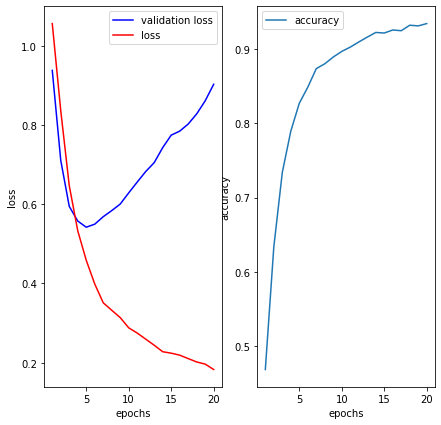

In [58]:
ran = np.arange(1,21)

plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.plot(ran,ann_m.history['val_loss'],color='blue',label='validation loss')
plt.plot(ran,ann_m.history['loss'],color='red',label = 'loss')
plt.legend(['validation loss','loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.subplot(1,2,2)
# plt.figure(figsize=(7,7))
plt.plot(ran,ann_m.history['accuracy'],label='accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy'])